In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

class GenePresenceAbsencePlotter:
    def __init__(self, path_csv):
        self.path_csv = path_csv
        self.df_binary = None
        self.df_selected = None
        self.pattern_counts = None

    def load_and_process_data(self):
        # Load the data
        df = pd.read_csv(self.path_csv, sep=',', index_col=0)
        
        # Isolate the binary presence/absence data for genes across strains
        index_avg_group_size = df.columns.get_loc('Avg group size nuc')
        self.df_binary = df.iloc[:, index_avg_group_size+1:].notna().astype(int)

    def identify_unique_patterns(self):
        # Transpose df_binary so that genes are columns and strains are rows
        df_transposed = self.df_binary.transpose()
        
        # Create a summary representation for each strain
        pattern_strings = df_transposed.apply(lambda x: ''.join(x.astype(str)), axis=1)
        self.pattern_counts = pattern_strings.value_counts()
        
        # Select representative strains
        representative_strains = pattern_strings.drop_duplicates()
        self.df_selected = df_transposed.loc[representative_strains.index]

    def plot_heatmap(self):
        # Create a custom color map for the heatmap
        cmap = ListedColormap(['#ffffd9', '#41b6c4'])  # Yellow for absence (0), Blue for presence (1)
        
        # Plotting the heatmap
        plt.figure(figsize=(20, 10))
        ax = sns.heatmap(self.df_selected, cmap=cmap, cbar=True, xticklabels=True, yticklabels=True,
                         cbar_kws={'ticks': [0, 1], 'label': 'Gene Presence/Absence'})
        
        # Customize the color bar to show "Absent" and "Present" labels
        cbar = ax.collections[0].colorbar
        cbar.set_ticklabels(['Absent', 'Present'])
        
        # Adjusting the annotation process to match strain names with their counts
        for i, (index_value, row) in enumerate(self.df_selected.iterrows()):
            pattern = ''.join(row.astype(str))
            count = self.pattern_counts[pattern]
            plt.text(0.5, i + 0.5, f'Count: {count}', ha='center', va='center', color='black', fontsize=7)
    
        plt.title('Heatmap of Gene Presence/Absence Across Selected Strains')
        plt.xlabel('Genes')
        plt.ylabel('Selected Strains (Unique Patterns)')
        plt.xticks(rotation=90)  # Rotate gene labels for better readability
        plt.show()

Cellulose_locus_8genes_NZ_CAPB01000041_1708537946

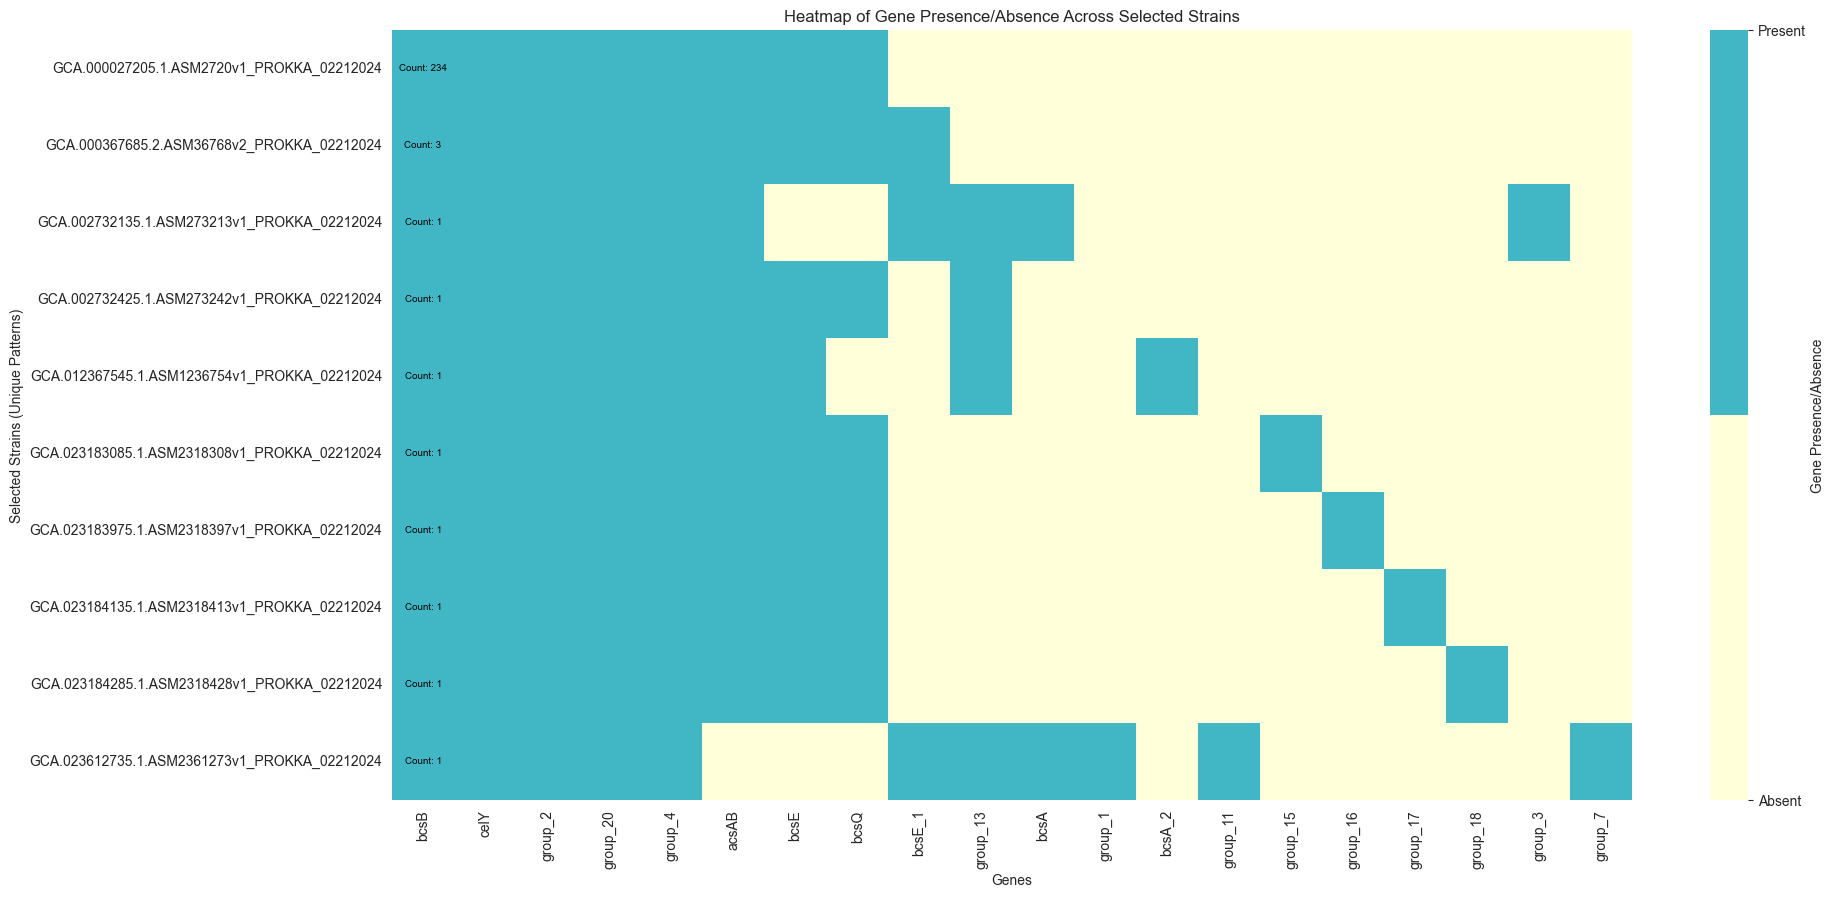

In [25]:
path_csv = '/Users/josediogomoura/Documents/BioFago/BioFago/data/roary/Cellulose_locus_8genes_NZ_CAPB01000041_1708537946/gene_presence_absence.csv'  # Make sure to use the correct path
plotter = GenePresenceAbsencePlotter(path_csv)
plotter.load_and_process_data()
plotter.identify_unique_patterns()
plotter.plot_heatmap()

Capsule_locus_12genes_X77921_1708539858

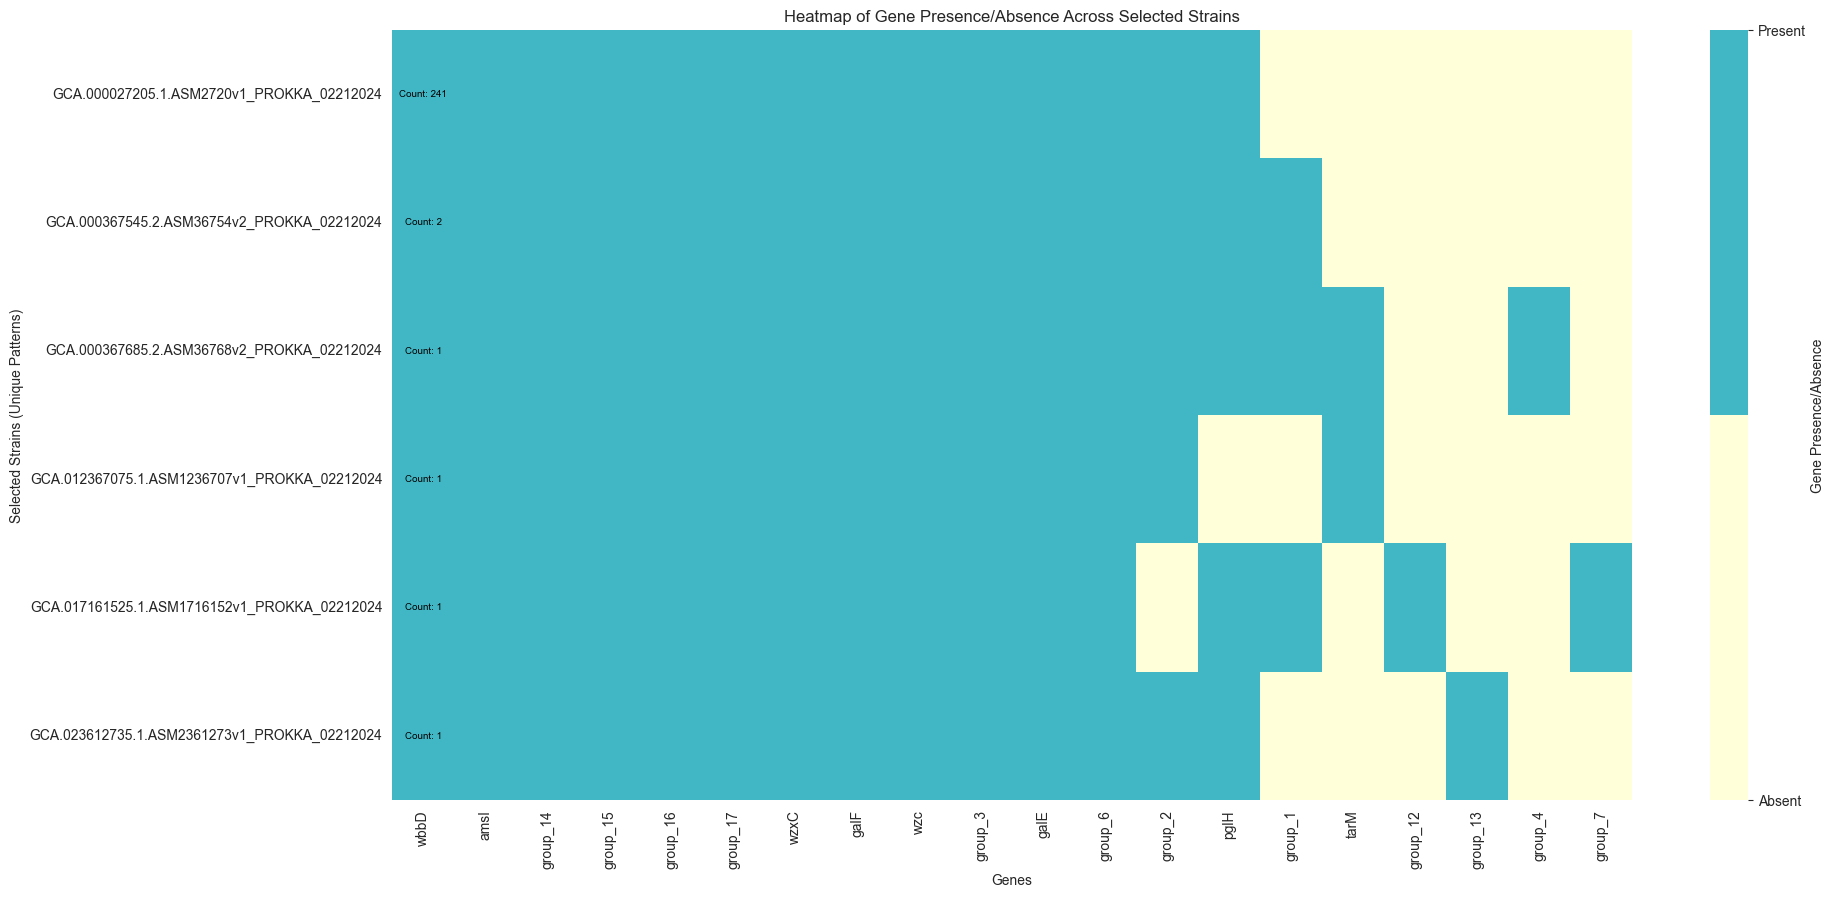

In [26]:
path_csv = '/Users/josediogomoura/Documents/BioFago/BioFago/data/roary/Capsule_locus_12genes_X77921_1708539858/gene_presence_absence.csv'  # Make sure to use the correct path
plotter = GenePresenceAbsencePlotter(path_csv)
plotter.load_and_process_data()
plotter.identify_unique_patterns()
plotter.plot_heatmap()

LPS_locus_13genes_FN434113

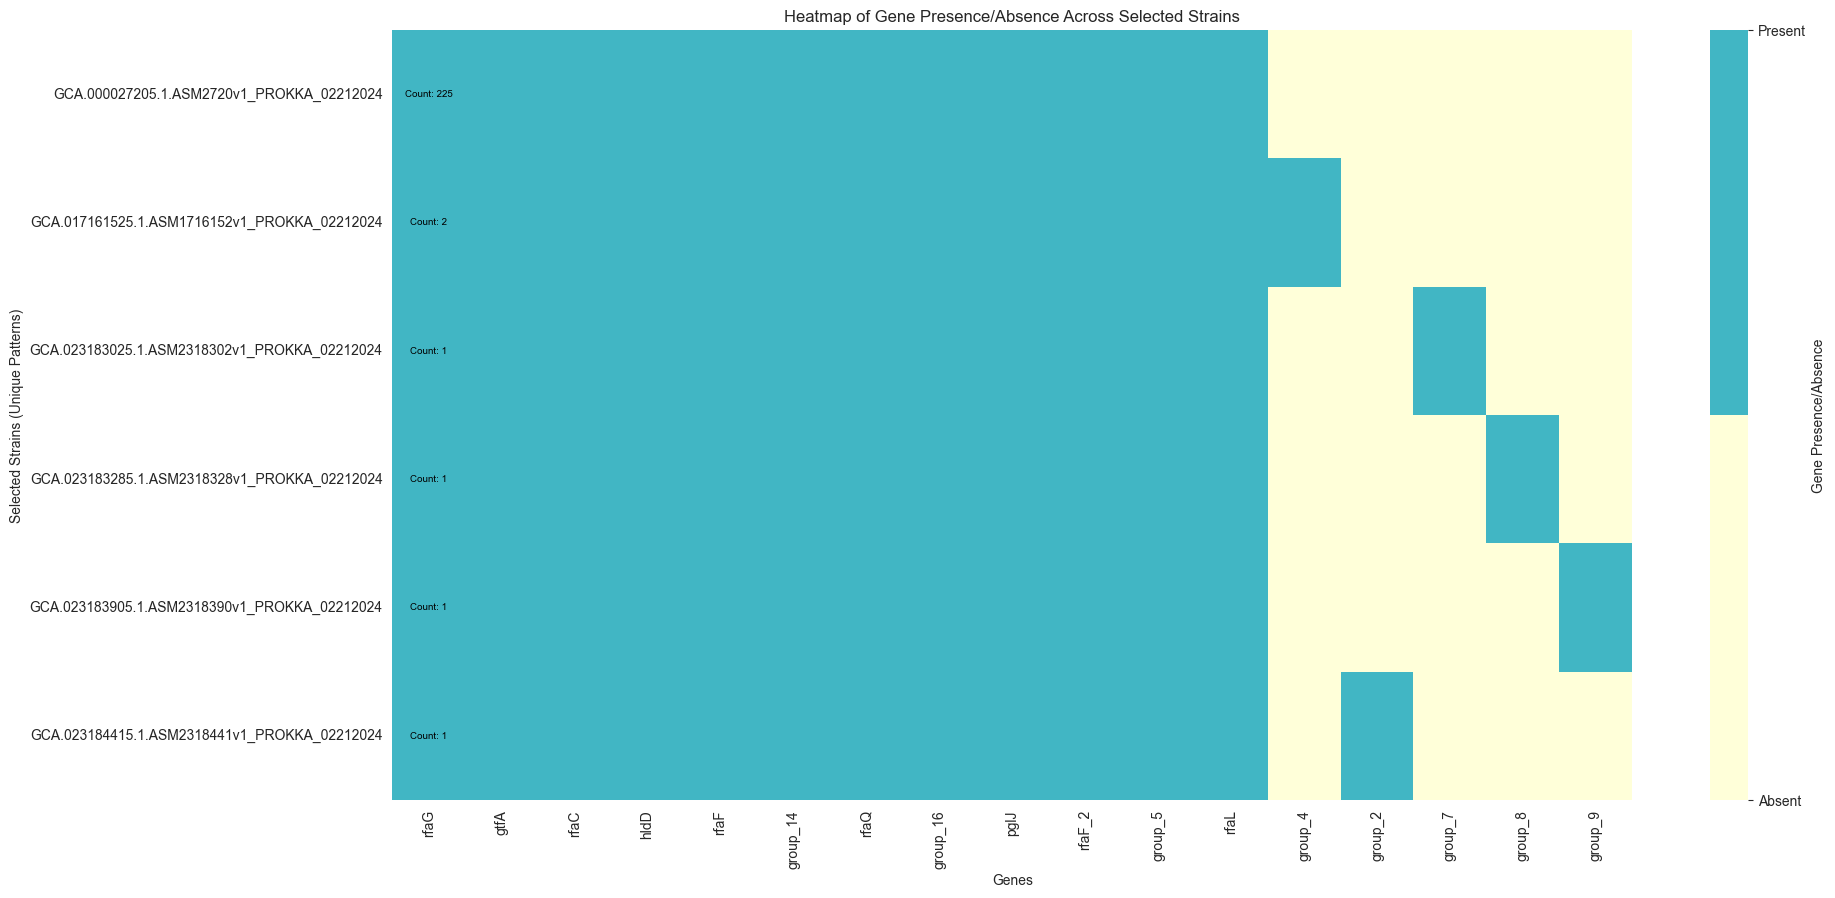

In [29]:
path_csv = '/Users/josediogomoura/Documents/BioFago/BioFago/data/roary/LPS_locus_13genes_FN434113_1708538265/gene_presence_absence.csv' 

plotter = GenePresenceAbsencePlotter(path_csv)
plotter.load_and_process_data()
plotter.identify_unique_patterns()
plotter.plot_heatmap()